# Exploratory Data Analysis

In [1]:
%%capture
%pip install statsmodel

In [2]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
import statsmodels.api as sm

In [3]:
df = pd.read_csv('../Data/term-deposit-marketing-2020.csv')
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,no


In [4]:
df.isna().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
y            0
dtype: int64

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40000 entries, 0 to 39999
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        40000 non-null  int64 
 1   job        40000 non-null  object
 2   marital    40000 non-null  object
 3   education  40000 non-null  object
 4   default    40000 non-null  object
 5   balance    40000 non-null  int64 
 6   housing    40000 non-null  object
 7   loan       40000 non-null  object
 8   contact    40000 non-null  object
 9   day        40000 non-null  int64 
 10  month      40000 non-null  object
 11  duration   40000 non-null  int64 
 12  campaign   40000 non-null  int64 
 13  y          40000 non-null  object
dtypes: int64(5), object(9)
memory usage: 4.3+ MB


In [6]:
for col in df.columns:
    if df[col].dtype != 'object':
        print(col)
        print(df[col].value_counts().keys().max())
        print()

age
95

balance
102127

day
31

duration
4918

campaign
63



Features look to have no missing values. Below I will change the 'object' types to 'category' and age, day, and campaign to 'int8' for memory purposes.

In [7]:
for col in df.columns:
    if df[col].dtype == 'object':
        df[col] = df[col].astype('category')
    elif col == 'age' or col == 'day' or col == 'campaign':
        df[col] = df[col].astype('int8')
    elif col == 'balance' or col == 'duration':
        df[col] = df[col].astype('int32')

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40000 entries, 0 to 39999
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype   
---  ------     --------------  -----   
 0   age        40000 non-null  int8    
 1   job        40000 non-null  category
 2   marital    40000 non-null  category
 3   education  40000 non-null  category
 4   default    40000 non-null  category
 5   balance    40000 non-null  int32   
 6   housing    40000 non-null  category
 7   loan       40000 non-null  category
 8   contact    40000 non-null  category
 9   day        40000 non-null  int8    
 10  month      40000 non-null  category
 11  duration   40000 non-null  int32   
 12  campaign   40000 non-null  int8    
 13  y          40000 non-null  category
dtypes: category(9), int32(2), int8(3)
memory usage: 783.1 KB


In [9]:
for col in ['default', 'housing', 'loan', 'y']:
    print(f"Column: {col}")
    print(df[col].value_counts())
    print()

Column: default
default
no     39191
yes      809
Name: count, dtype: int64

Column: housing
housing
yes    24031
no     15969
Name: count, dtype: int64

Column: loan
loan
no     33070
yes     6930
Name: count, dtype: int64

Column: y
y
no     37104
yes     2896
Name: count, dtype: int64



In [10]:
df.replace({'no': 0, 'yes': 1}, inplace=True)
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,y
0,58,management,married,tertiary,0,2143,1,0,unknown,5,may,261,1,0
1,44,technician,single,secondary,0,29,1,0,unknown,5,may,151,1,0
2,33,entrepreneur,married,secondary,0,2,1,1,unknown,5,may,76,1,0
3,47,blue-collar,married,unknown,0,1506,1,0,unknown,5,may,92,1,0
4,33,unknown,single,unknown,0,1,0,0,unknown,5,may,198,1,0


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40000 entries, 0 to 39999
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype   
---  ------     --------------  -----   
 0   age        40000 non-null  int8    
 1   job        40000 non-null  category
 2   marital    40000 non-null  category
 3   education  40000 non-null  category
 4   default    40000 non-null  category
 5   balance    40000 non-null  int32   
 6   housing    40000 non-null  category
 7   loan       40000 non-null  category
 8   contact    40000 non-null  category
 9   day        40000 non-null  int8    
 10  month      40000 non-null  category
 11  duration   40000 non-null  int32   
 12  campaign   40000 non-null  int8    
 13  y          40000 non-null  category
dtypes: category(9), int32(2), int8(3)
memory usage: 783.1 KB


In [ ]:
for col in ['default', 'housing', 'loan', 'y']:
    df[col] = df[col].astype('int8')

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40000 entries, 0 to 39999
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype   
---  ------     --------------  -----   
 0   age        40000 non-null  int8    
 1   job        40000 non-null  category
 2   marital    40000 non-null  category
 3   education  40000 non-null  category
 4   default    40000 non-null  int8    
 5   balance    40000 non-null  int32   
 6   housing    40000 non-null  int8    
 7   loan       40000 non-null  int8    
 8   contact    40000 non-null  category
 9   day        40000 non-null  int8    
 10  month      40000 non-null  category
 11  duration   40000 non-null  int32   
 12  campaign   40000 non-null  int8    
 13  y          40000 non-null  int8    
dtypes: category(5), int32(2), int8(7)
memory usage: 782.6 KB


In [14]:
df.to_parquet('../Data/term-deposit-marketing-2020-shrunk.parquet', index=False)

In [15]:
df = pd.read_parquet('../Data/term-deposit-marketing-2020-shrunk.parquet')

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40000 entries, 0 to 39999
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype   
---  ------     --------------  -----   
 0   age        40000 non-null  int8    
 1   job        40000 non-null  category
 2   marital    40000 non-null  category
 3   education  40000 non-null  category
 4   default    40000 non-null  int8    
 5   balance    40000 non-null  int32   
 6   housing    40000 non-null  int8    
 7   loan       40000 non-null  int8    
 8   contact    40000 non-null  category
 9   day        40000 non-null  int8    
 10  month      40000 non-null  category
 11  duration   40000 non-null  int32   
 12  campaign   40000 non-null  int8    
 13  y          40000 non-null  int8    
dtypes: category(5), int32(2), int8(7)
memory usage: 782.6 KB


## Demographic Data

In [17]:
demo_describe = df.describe()[['age', 'balance']]
demo_describe

,age,balance
count,40000.000000,40000.000000
mean,40.544600,1274.277550
std,9.641776,2903.769716
min,19.000000,-8019.000000
25%,33.000000,54.000000
50%,39.000000,407.000000
75%,48.000000,1319.000000
max,95.000000,102127.000000


In [18]:
demo_describe.loc['range'] = demo_describe.loc['max'] - demo_describe.loc['min']
demo_describe

,age,balance
count,40000.000000,40000.000000
mean,40.544600,1274.277550
std,9.641776,2903.769716
min,19.000000,-8019.000000
25%,33.000000,54.000000
50%,39.000000,407.000000
75%,48.000000,1319.000000
max,95.000000,102127.000000
range,76.000000,110146.000000


#### age

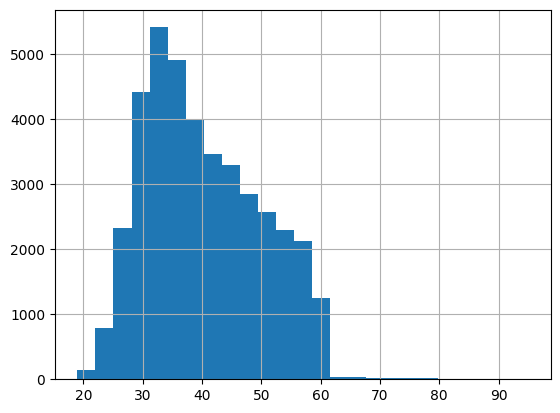

In [19]:
df['age'].hist(bins=25)
plt.show()

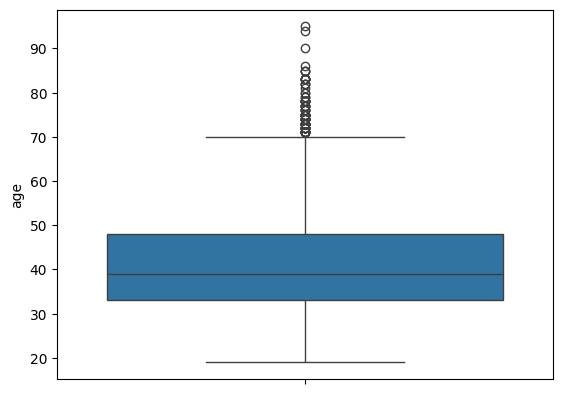

In [20]:
sns.boxplot(df['age'])
plt.show()

In [21]:
## outliers in age

outliers_as_decimal = len(df[df['age'] > 70])/len(df)

print(f"Percentage of 'age' outliers: {outliers_as_decimal*100}%")

Percentage of 'age' outliers: 0.1975%


Not enough to consider removing from dataset

#### balance

Average yearly balance (in euros)

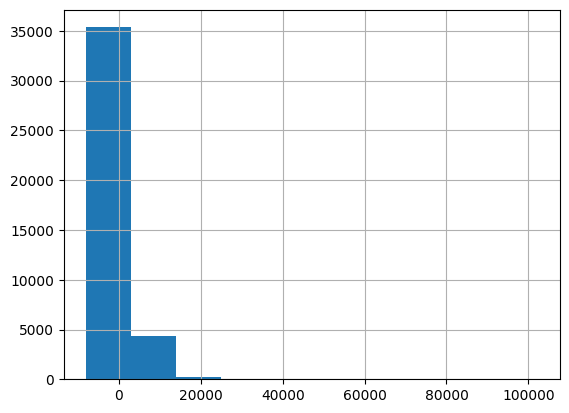

In [22]:
df['balance'].hist()
plt.show()

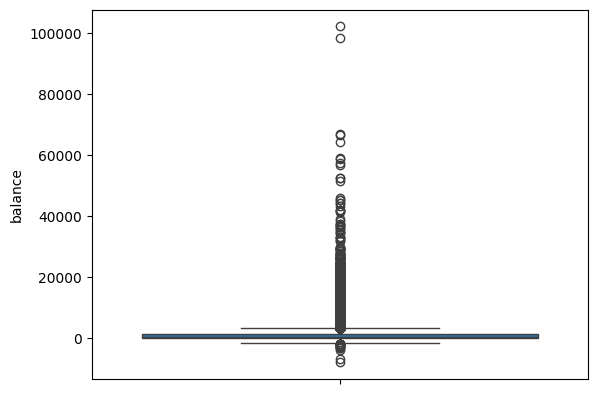

In [23]:
sns.boxplot(df['balance'])
plt.show()

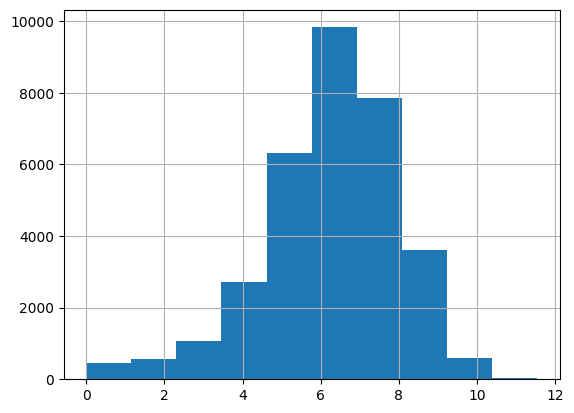

In [24]:
## positive balances (log scale)

df[df['balance']>0.0]['balance'].apply('log').hist()
plt.show()

In [25]:
positive_balance_fraction = df[df['balance']>0.0]['y'].sum()/len(df[df['balance']>0.0])

print(f"Percentage of subscribers who have an average positive balance: {positive_balance_fraction*100}%")

Percentage of subscribers who have an average positive balance: 7.6225045372050815%


In [26]:
## checking for similarity between log transformation and actual value
import math
from math import e

balance_log_0 = np.log(df['balance'][0])
balance_0_e = round(e**balance_log_0,2)

print(f"Value before transformation:               {df['balance'][0]}")
print(f"Value after reversing the transformation:  {balance_0_e}")

print(f"Are the values the same:                   {df['balance'][0] == balance_0_e}")

Value before transformation:               2143
Value after reversing the transformation:  2143.0
Are the values the same:                   True


In [27]:
neg_balance = df[df['balance'] < 0.0]
neg_balance.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,y
25,44,admin,married,secondary,0,-372,1,0,unknown,5,may,172,1,0
28,46,management,single,secondary,0,-246,1,0,unknown,5,may,255,2,0
36,25,blue-collar,married,secondary,0,-7,1,0,unknown,5,may,365,1,0
37,53,technician,married,secondary,0,-3,0,0,unknown,5,may,1666,1,0
45,36,admin,single,primary,0,-171,1,0,unknown,5,may,242,1,0


In [28]:
neg_balance['abs_balance'] = np.abs(neg_balance['balance'])
neg_balance.head()

/var/folders/ly/yp55phj14sggk71834drw0d80000gn/T/ipykernel_11949/2670850899.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  neg_balance['abs_balance'] = np.abs(neg_balance['balance'])


,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,y,abs_balance
25,44,admin,married,secondary,0,-372,1,0,unknown,5,may,172,1,0,372
28,46,management,single,secondary,0,-246,1,0,unknown,5,may,255,2,0,246
36,25,blue-collar,married,secondary,0,-7,1,0,unknown,5,may,365,1,0,7
37,53,technician,married,secondary,0,-3,0,0,unknown,5,may,1666,1,0,3
45,36,admin,single,primary,0,-171,1,0,unknown,5,may,242,1,0,171


In [29]:
neg_balance.describe()[['age', 'balance', 'abs_balance']]

,age,balance,abs_balance
count,3731.000000,3731.000000,3731.000000
mean,39.528545,-319.280890,319.280890
std,9.057897,369.754826,369.754826
min,20.000000,-8019.000000,1.000000
25%,32.000000,-423.000000,94.000000
50%,38.000000,-231.000000,231.000000
75%,46.000000,-94.000000,423.000000
max,63.000000,-1.000000,8019.000000


In [30]:
neg_balance['log_balance'] = neg_balance['abs_balance'].apply('log')

/var/folders/ly/yp55phj14sggk71834drw0d80000gn/T/ipykernel_11949/3399522700.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  neg_balance['log_balance'] = neg_balance['abs_balance'].apply('log')


In [31]:
neg_balance.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,y,abs_balance,log_balance
25,44,admin,married,secondary,0,-372,1,0,unknown,5,may,172,1,0,372,5.918894
28,46,management,single,secondary,0,-246,1,0,unknown,5,may,255,2,0,246,5.505332
36,25,blue-collar,married,secondary,0,-7,1,0,unknown,5,may,365,1,0,7,1.945910
37,53,technician,married,secondary,0,-3,0,0,unknown,5,may,1666,1,0,3,1.098612
45,36,admin,single,primary,0,-171,1,0,unknown,5,may,242,1,0,171,5.141664


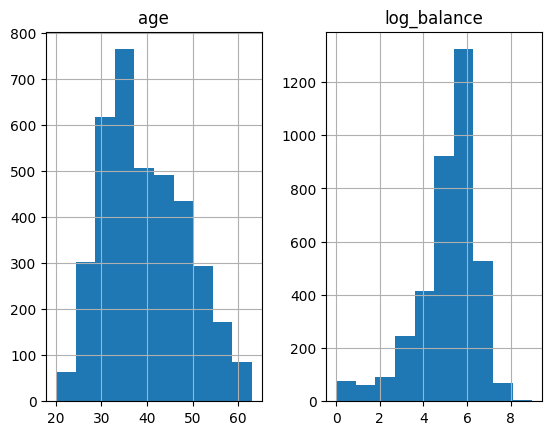

In [32]:
neg_balance[['age', 'log_balance']].hist()
plt.show()

In [33]:
neg_balance_as_decimal = neg_balance.shape[0]/df.shape[0]

print(f"Percentage of customers with negative balances: {round(neg_balance_as_decimal*100, 2)}%")

Percentage of customers with negative balances: 9.33%


In [34]:
negative_bal_subscribers_decimal = neg_balance['y'].sum()/len(df)

print(f"Percentage of subscribers that carry an average negative balance: {negative_bal_subscribers_decimal*100}%")

Percentage of subscribers that carry an average negative balance: 0.4925%


#### job

In [35]:
df['job'].value_counts()

job
blue-collar      9383
management       8166
technician       6852
admin            4483
services         3910
retired          1437
self-employed    1414
entrepreneur     1405
unemployed       1104
housemaid        1087
student           524
unknown           235
Name: count, dtype: int64

In [36]:
df[df['job']=='unknown']

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,y
4,33,unknown,single,unknown,0,1,0,0,unknown,5,may,198,1,0
216,47,unknown,married,unknown,0,28,0,0,unknown,5,may,338,2,0
354,59,unknown,divorced,unknown,0,27,0,0,unknown,5,may,347,3,0
876,37,unknown,single,unknown,0,414,1,0,unknown,7,may,131,1,0
1072,29,unknown,single,primary,0,50,1,0,unknown,7,may,50,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39556,29,unknown,single,secondary,0,923,0,0,cellular,26,may,333,1,0
39564,47,unknown,married,unknown,0,8,0,0,telephone,26,may,164,1,0
39570,54,unknown,married,secondary,0,1157,0,0,cellular,26,may,98,2,0
39803,47,unknown,single,unknown,0,1819,0,0,cellular,1,jun,180,1,0


There are 235 observations that have 'unknown' as their job title. There isn't anything from the client saying that we can clump the 'unknowns' with any other job title. So, seeing that observations that have a job title of 'unknown' are less than 1% of the total dataset, we will remove them from the dataset and carry on with the analysis.

In [37]:
job_mask = df['job'] == 'unknown'

print(df.shape) ## before dropping the unknowns
df.drop(df[job_mask].index, axis=0, inplace=True)

df.shape

(40000, 14)


(39765, 14)

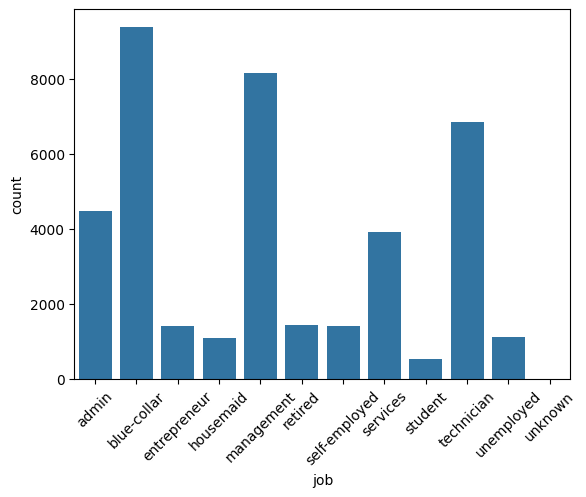

In [38]:
sns.countplot(df,
              x=df['job'],
              legend=False)
plt.xticks(rotation=45)
plt.show()

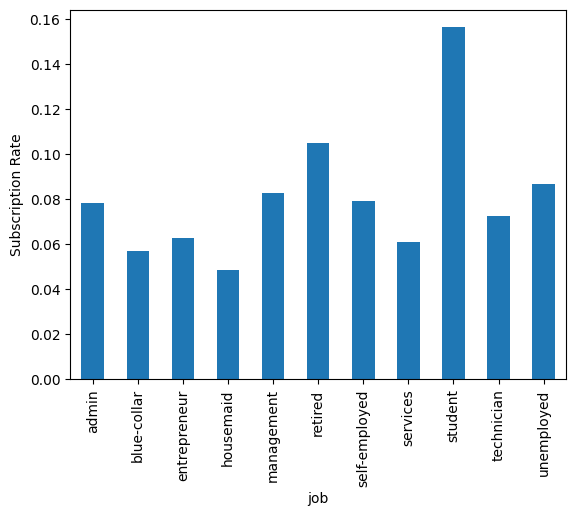

In [39]:
df.groupby('job', observed=False).agg({'y': 'mean'}).drop('unknown', axis=0).plot(kind='bar', legend=False)
plt.ylabel('Subscription Rate')
plt.show()

#### marital

In [40]:
df['marital'].value_counts()

marital
married     24221
single      10834
divorced     4710
Name: count, dtype: int64

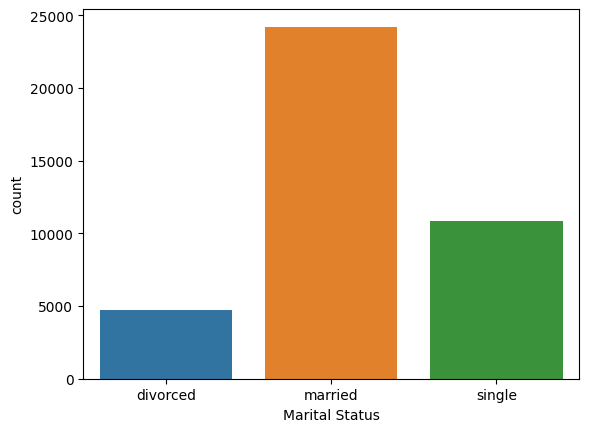

In [41]:
sns.countplot(df,
              x=df['marital'],
              hue=df['marital'],
              legend=False)
plt.xlabel('Marital Status')
plt.show()

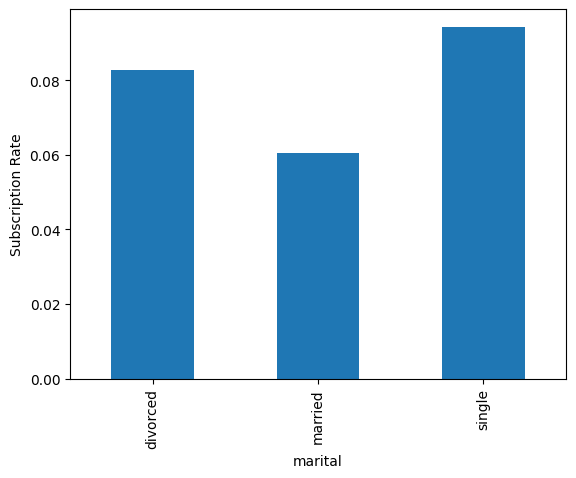

In [42]:
df.groupby('marital', observed=False).agg({'y': 'mean'}).plot(kind='bar', legend=False)
plt.ylabel('Subscription Rate')
plt.show()

#### education

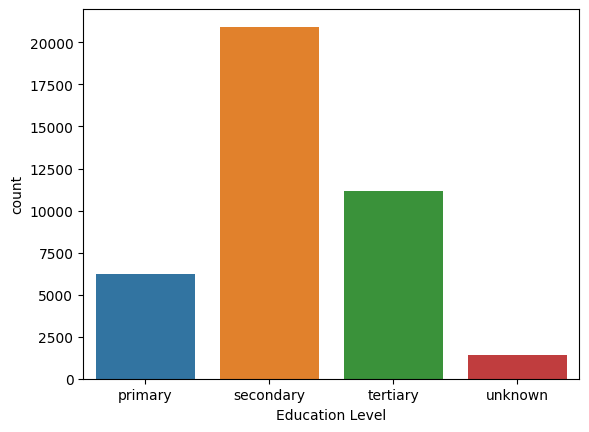

In [43]:
sns.countplot(df,
              x=df['education'],
              hue=df['education'],
              legend=False)
plt.xlabel('Education Level')
plt.show()

In [44]:
unknown_education = df[df['education']=='unknown']
unknown_education

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,y
3,47,blue-collar,married,unknown,0,1506,1,0,unknown,5,may,92,1,0
13,58,technician,married,unknown,0,71,1,0,unknown,5,may,71,1,0
16,45,admin,single,unknown,0,13,1,0,unknown,5,may,98,1,0
42,60,blue-collar,married,unknown,0,104,1,0,unknown,5,may,22,1,0
44,58,retired,married,unknown,0,96,1,0,unknown,5,may,616,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39772,24,student,single,unknown,0,839,0,0,cellular,1,jun,65,1,0
39821,34,student,single,unknown,0,1011,0,0,cellular,1,jun,253,1,1
39854,53,management,married,unknown,0,2240,1,0,cellular,2,jun,282,2,1
39880,28,management,single,unknown,0,560,0,0,cellular,2,jun,135,1,0


In [45]:
unknown_education_as_decimal = unknown_education.shape[0]/df.shape[0]

print(f"Percentage of customers with unknown education level: {round(unknown_education_as_decimal*100,2)}%")

Percentage of customers with unknown education level: 3.59%


Since the unknowns can't be clumped with either of the other three categories, we will just drop them from the dataset.

In [46]:
unknown_education_mask = df['education'] == 'unknown'

print(df.shape)
df.drop(df[unknown_education_mask].index, axis=0, inplace=True)

df.shape

(39765, 14)


(38338, 14)

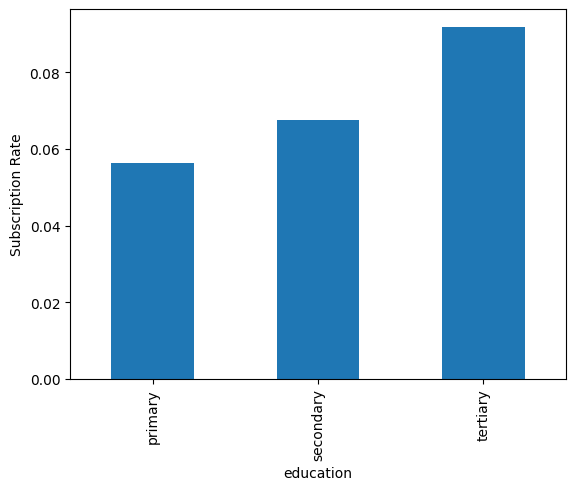

In [47]:
df.groupby('education', observed=True).agg({'y': 'mean'}).plot(kind='bar', legend=False)
plt.ylabel('Subscription Rate')
plt.show()

With the subscription rate per education level looking to have a linear relationship it might not be the best to ordinally encode this predictor.

#### default

In [48]:
df['default'].value_counts()

default
0    37562
1      776
Name: count, dtype: int64

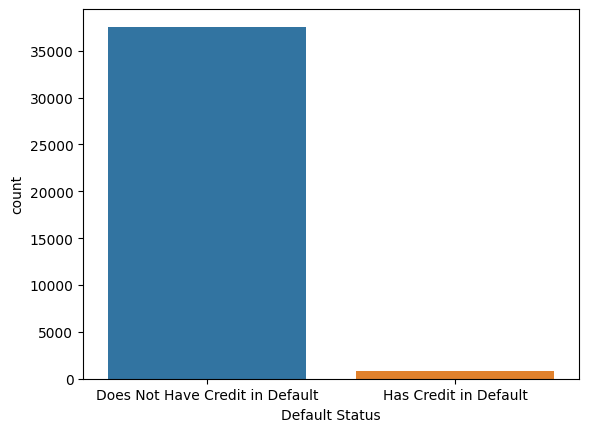

In [49]:
sns.countplot(df,
              x=df['default'],
              hue=df['default'],
              legend=False)
plt.xticks([0, 1], ['Does Not Have Credit in Default', 'Has Credit in Default'])
plt.xlabel('Default Status')
plt.show()

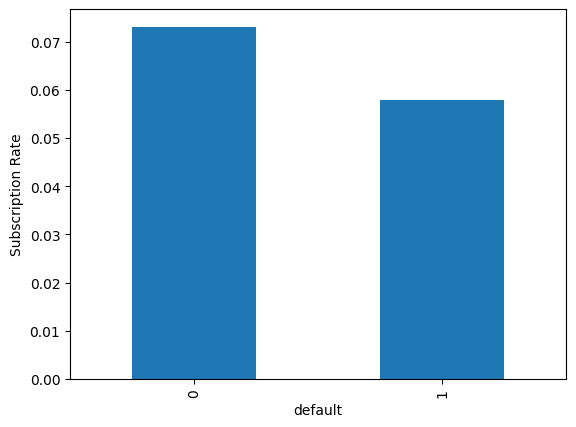

In [50]:
df.groupby('default', observed=True).agg({'y': 'mean'}).plot(kind='bar', legend=False)
plt.ylabel('Subscription Rate')
plt.show()

#### housing

In [51]:
df['housing'].value_counts()

housing
1    23229
0    15109
Name: count, dtype: int64

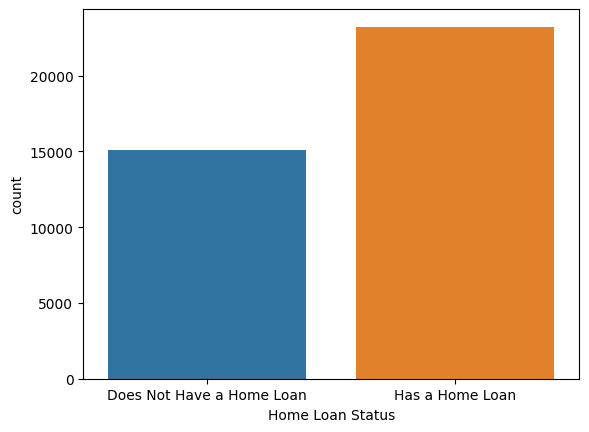

In [52]:
sns.countplot(df,
              x=df['housing'],
              hue=df['housing'],
              legend=False)
plt.xticks([0, 1], ['Does Not Have a Home Loan', 'Has a Home Loan'])
plt.xlabel('Home Loan Status')
plt.show()

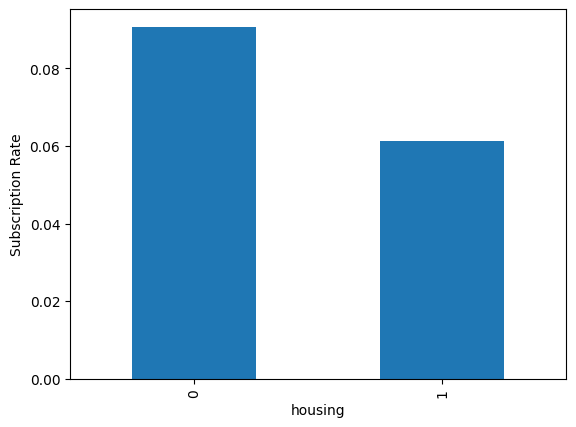

In [53]:
df.groupby('housing', observed=True).agg({'y': 'mean'}).plot(kind='bar', legend=False)
plt.ylabel('Subscription Rate')
plt.show()

#### loan

In [54]:
df['loan'].value_counts()

loan
0    31539
1     6799
Name: count, dtype: int64

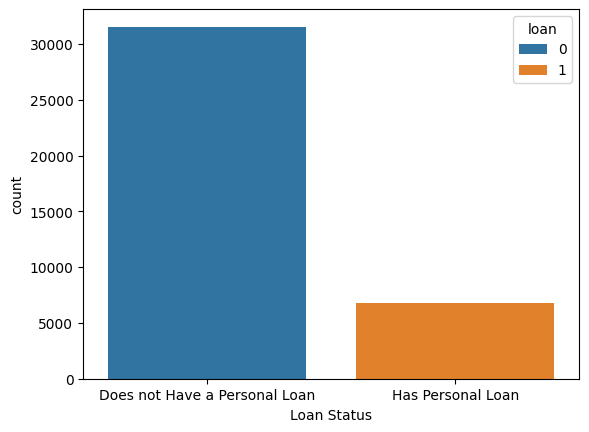

In [55]:
sns.countplot(df,
              x=df['loan'],
              hue=df['loan'])
plt.xticks([0, 1], ['Does not Have a Personal Loan', 'Has Personal Loan'])
plt.xlabel('Loan Status')
plt.show()

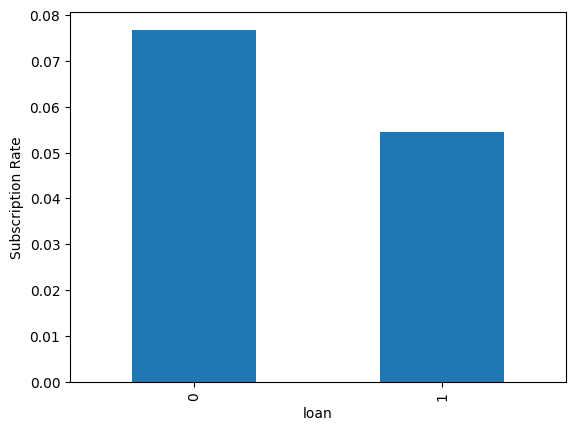

In [56]:
df.groupby('loan', observed=True).agg({'y': 'mean'}).plot(kind='bar', legend=False)
plt.ylabel('Subscription Rate')
plt.show()

## Campaign Data

In [57]:
camp_df_describe = df.describe()[['day', 'duration', 'campaign']]
camp_df_describe

,day,duration,campaign
count,38338.000000,38338.000000,38338.000000
mean,16.016094,255.102170,2.873441
std,8.261625,259.771013,3.198993
min,1.000000,0.000000,1.000000
25%,8.000000,100.000000,1.000000
50%,17.000000,175.000000,2.000000
75%,21.000000,313.000000,3.000000
max,31.000000,4918.000000,58.000000


In [58]:
camp_df_describe.loc['range'] = camp_df_describe.loc['max'] - camp_df_describe.loc['min']
camp_df_describe

,day,duration,campaign
count,38338.000000,38338.000000,38338.000000
mean,16.016094,255.102170,2.873441
std,8.261625,259.771013,3.198993
min,1.000000,0.000000,1.000000
25%,8.000000,100.000000,1.000000
50%,17.000000,175.000000,2.000000
75%,21.000000,313.000000,3.000000
max,31.000000,4918.000000,58.000000
range,30.000000,4918.000000,57.000000


Minimum values look to be correct:
* day: minimum day of 1 would correspond to only 1 day of contact with customer
* duration: minimum of 0 would correspond to no contact made
* campaign: minimum of 1 would correspond to only have contacted the customer once during the campaign

Maximum values for day look to be realistic:
* day: 31 days in a month

Maximum values for duration and campaign look possibly suspicious:
* duaration: 4918 seconds = ~82 minutes. This looks suspicious considering that it seems unlikely that someone would either be on hold to wait for someone or somone taking that long to pitch the product/think about subscribing to the product.
* campaign: maximum number of contacts made to customer. In this case 58 times for the campaign. It seems to be unlikely, but we will check it out when we get there.

#### day

Last contact day of the month for each customer.

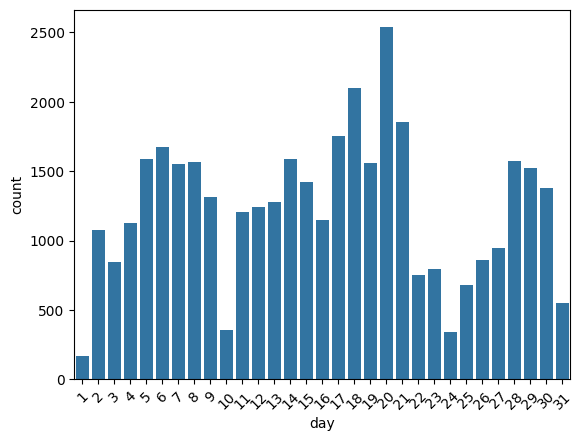

In [59]:
sns.countplot(x=df['day'])
plt.xticks(rotation=45)
plt.show()

#### duration

Last contact duration (seconds).

Since this amount is measured in seconds we will feature engineer a new feature that represents this value as minutes.

In [60]:
df['duration_minutes'] = df['duration']/60

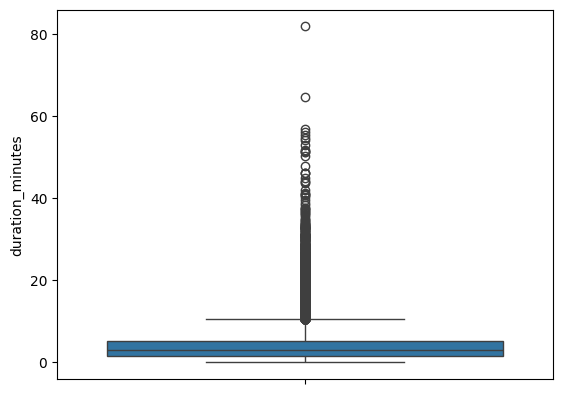

In [61]:
sns.boxplot(df['duration_minutes'])
plt.show()

In [62]:
## checking on the people that had a duration amount == 0

df[df['duration_minutes']==0.0]

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,y,duration_minutes
6424,53,management,married,primary,0,351,1,0,unknown,27,may,0,4,0,0.0
22937,35,technician,married,secondary,0,5535,0,0,cellular,26,aug,0,15,0,0.0
36425,31,entrepreneur,married,secondary,0,162,1,1,cellular,11,may,0,2,0,0.0


Since there are only three customers who were not contacted at all (duration of call was 0 minutes) we can drop these three instances from the dataset.

In [63]:
df.drop(labels='duration', axis=1, inplace=True)

In [64]:
no_duration_mask = df['duration_minutes'] == 0.0

print(df.shape)
df.drop(df[no_duration_mask].index, axis=0, inplace=True)

df.shape

(38338, 14)


(38335, 14)

In [65]:
df[df['duration_minutes'] > 60]

,age,job,marital,education,default,balance,housing,loan,contact,day,month,campaign,y,duration_minutes
9947,59,management,married,secondary,0,1321,0,0,unknown,9,jun,3,1,64.683333
24148,59,technician,married,tertiary,0,6573,1,0,telephone,10,nov,1,0,81.966667


Since the two highly visible outliers are theoretically possible, we will leave them in the dataset.

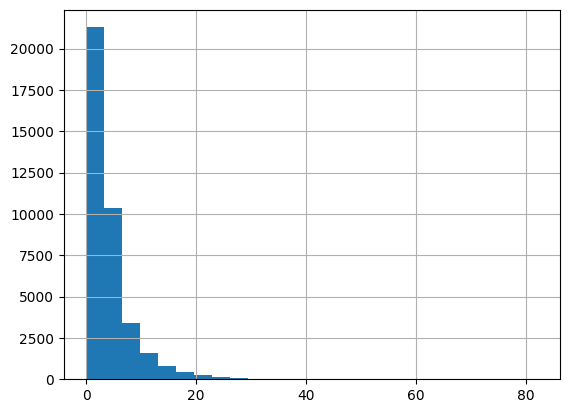

In [66]:
df['duration_minutes'].hist(bins=25)
plt.show()

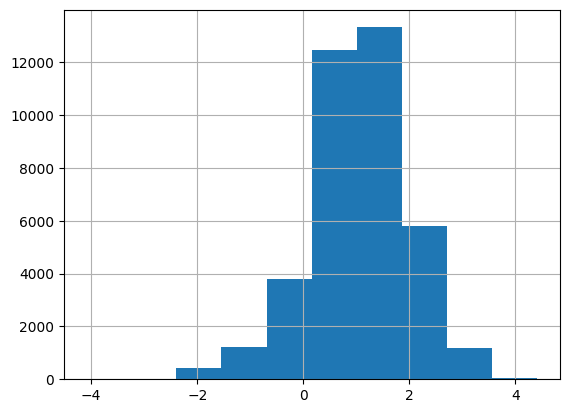

In [67]:
df['duration_minutes'].apply('log').hist()
plt.show()

#### campaign

This tells us how many times during the year that each customer was contacted about the term deposit product.

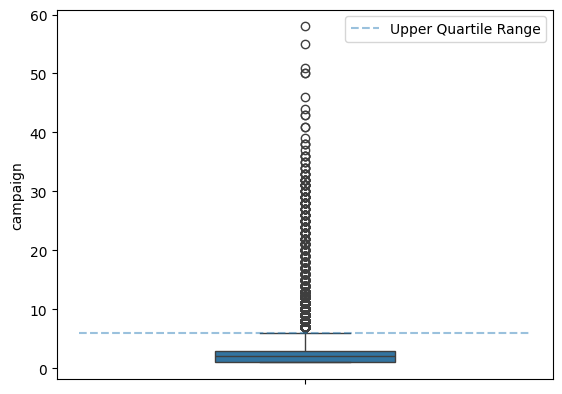

In [68]:
## upper IQR
### Q3 + (1.5 * IQR)

upper_iqr = camp_df_describe.loc['75%']['campaign'] + \
(1.5*(camp_df_describe.loc['75%']['campaign'] - camp_df_describe.loc['25%']['campaign']))

sns.boxplot(df['campaign'])
plt.hlines(y=[upper_iqr],
           xmin=[-1],
           xmax=[1],
           linestyles='dashed',
           alpha=.45,
           label='Upper Quartile Range')
plt.legend()
plt.show()

In [69]:
campaign_outliers = df[df['campaign']>upper_iqr]
campaign_outliers.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,campaign,y,duration_minutes
758,59,services,married,secondary,0,307,1,1,unknown,6,may,7,0,4.166667
780,30,admin,married,secondary,0,4,0,0,unknown,7,may,8,0,2.866667
906,27,services,single,secondary,0,0,1,0,unknown,7,may,7,0,6.466667
1105,43,admin,married,tertiary,0,1924,1,0,unknown,7,may,7,0,4.066667
1386,37,admin,married,primary,0,242,1,0,unknown,8,may,8,0,2.683333


In [70]:
campaign_outliers_to_dataset = campaign_outliers.shape[0]/df.shape[0]
print(f"Campaign outliers compared to whole dataset: {round(campaign_outliers_to_dataset*100, 2)}%")

Campaign outliers compared to whole dataset: 7.4%


In [71]:
campaign_outliers.sort_values(by='campaign', ascending=False)[:10]

,age,job,marital,education,default,balance,housing,loan,contact,day,month,campaign,y,duration_minutes
11914,24,technician,single,primary,0,126,1,0,unknown,20,jun,58,0,0.166667
5073,35,technician,married,secondary,0,432,1,0,unknown,21,may,55,0,18.233333
4299,30,management,single,tertiary,0,358,1,0,unknown,19,may,51,0,1.466667
5459,35,blue-collar,married,secondary,0,430,1,0,unknown,23,may,50,0,2.450000
18713,35,blue-collar,married,secondary,0,280,1,1,cellular,31,jul,50,0,1.083333
10697,28,blue-collar,single,secondary,0,235,1,0,unknown,16,jun,46,0,1.700000
18744,49,blue-collar,married,primary,0,371,1,0,cellular,31,jul,44,0,0.300000
4275,40,blue-collar,married,secondary,0,-365,1,0,unknown,19,may,43,0,0.733333
18660,33,blue-collar,married,secondary,0,0,1,1,cellular,31,jul,43,0,0.266667
4334,42,blue-collar,married,primary,0,170,1,0,unknown,19,may,41,0,0.850000


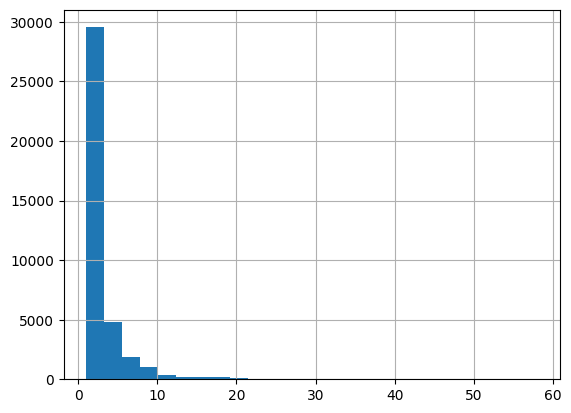

In [72]:
df['campaign'].hist(bins=25)
plt.show()

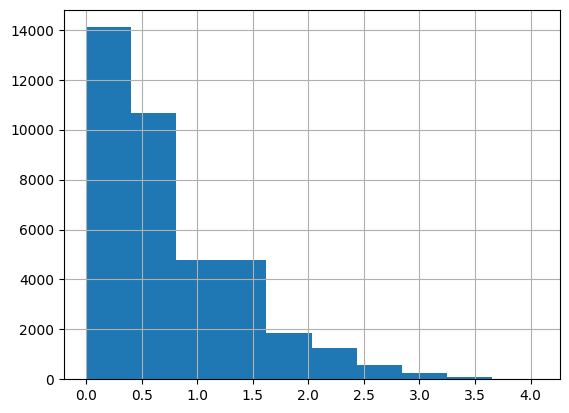

In [73]:
df['campaign'].apply('log').hist()
plt.show()

#### contact

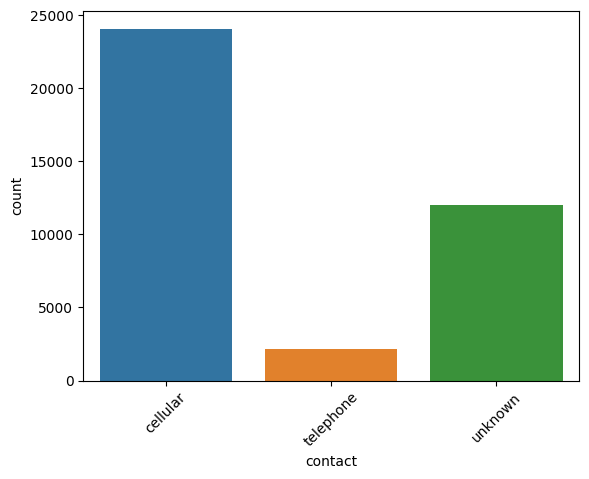

In [74]:
sns.countplot(df,
              x=df['contact'],
              hue=df['contact'])
plt.xticks(rotation=45)
plt.show()

It would be nice to know what we could do with the unknowns in this case, but we will just have to leave them in since there are so many of them.

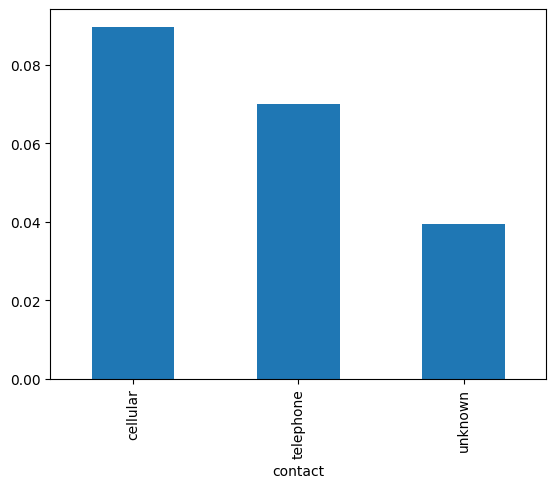

In [75]:
df.groupby('contact', observed=True).agg({'y': 'mean'}).plot(kind='bar', legend=False)
plt.show()

Ordinal encoding didn't look to be a good option and we see that the linear relationship confirms that. 

#### month

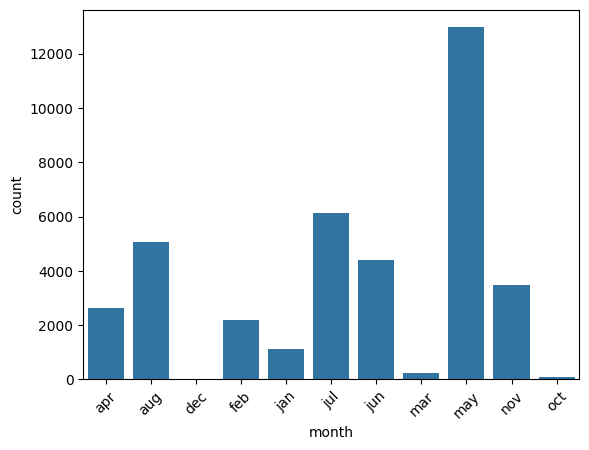

In [76]:
sns.countplot(x=df['month'])
plt.xticks(rotation=45)
plt.show()

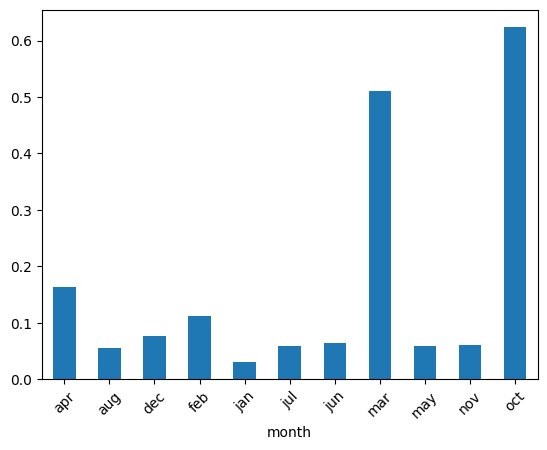

In [77]:
df.groupby('month', observed=True).agg({'y': 'mean'}).plot(kind='bar', legend=False, rot=45)
plt.show()

### target variable

In [78]:
y_vals = df['y'].value_counts(normalize=True).values

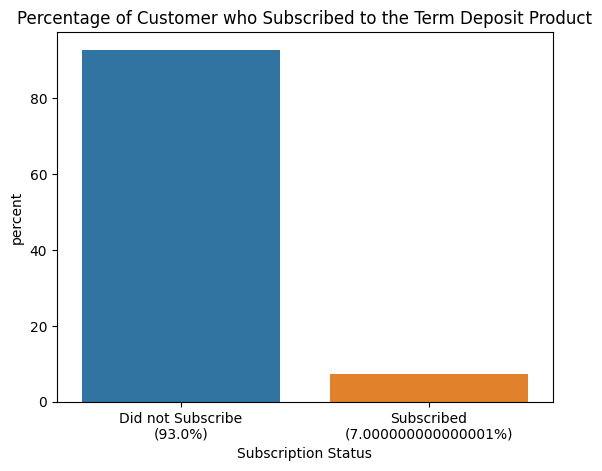

In [79]:
sns.countplot(df,
              x='y',
              hue='y',
              stat='percent',
              legend=False)
plt.xlabel('Subscription Status')
plt.xticks([0, 1],
           [f'Did not Subscribe\n({round(y_vals[0],2)*100}%)',
            f'Subscribed\n({round(y_vals[1],2)*100}%)'])
plt.title('Percentage of Customer who Subscribed to the Term Deposit Product')
plt.show()

Since the target variable is vastly skewed toward the customers who did not subscribe to the term deposit product (in this case the negative class) the accuracy metric will not work to classify customers. Using that metric will most likely result in a null model classifying ~93% of customers to the negative class. That is a good score and better than what the client wants, but the result will be highly misleading as to the effectiveness of the model.

Metrics like the F-1 score will be more suitable to assessing model performance and the precision-recall curve to visualize the tradeoff between and false negatives and false positives (which is what we are trying to mitigate). 

In [80]:
## save updated dataset

df.to_parquet('../Data/term-deposit-marketing-2020-amended.parquet', index=False)

## Treating Categorical Variables

There are numerous categorical predictors in the dataset, such as marital, job, education, contact, etc. Most if not all will be one-hot encoded (one predictor per category) due to the nature of these variables not necessarily being of an ordinal variable. In theory, we could rank education by primary = 1, secondary = 2, and tertiary = 3. Since certain models will find the linearity that is present if we encode this variable as such, we will just one-hot-encode the education variable.

The other variables that don't make sense to ordinally encode are jobs and marital. There is no inherent ranking that we could administer to these variables, hence one-hot-encoding.

The month predictor could be ordinally encoded but there seems to be some cyclicity in the months when grouped by the average of the target variable.

In [92]:
df = pd.read_parquet('../Data/term-deposit-marketing-2020-amended.parquet')
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,campaign,y,duration_minutes
0,58,management,married,tertiary,0,2143,1,0,unknown,5,may,1,0,4.350000
1,44,technician,single,secondary,0,29,1,0,unknown,5,may,1,0,2.516667
2,33,entrepreneur,married,secondary,0,2,1,1,unknown,5,may,1,0,1.266667
3,35,management,married,tertiary,0,231,1,0,unknown,5,may,1,0,2.316667
4,28,management,single,tertiary,0,447,1,1,unknown,5,may,1,0,3.616667


In [93]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38335 entries, 0 to 38334
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   age               38335 non-null  int8    
 1   job               38335 non-null  category
 2   marital           38335 non-null  category
 3   education         38335 non-null  category
 4   default           38335 non-null  int8    
 5   balance           38335 non-null  int32   
 6   housing           38335 non-null  int8    
 7   loan              38335 non-null  int8    
 8   contact           38335 non-null  category
 9   day               38335 non-null  int8    
 10  month             38335 non-null  category
 11  campaign          38335 non-null  int8    
 12  y                 38335 non-null  int8    
 13  duration_minutes  38335 non-null  float64 
dtypes: category(5), float64(1), int32(1), int8(7)
memory usage: 899.8 KB


In [102]:
dummy_df = pd.get_dummies(df)
dummy_df.head()

,age,default,balance,housing,loan,day,campaign,y,duration_minutes,job_admin,...,month_aug,month_dec,month_feb,month_jan,month_jul,month_jun,month_mar,month_may,month_nov,month_oct
0,58,0,2143,1,0,5,1,0,4.350000,False,...,False,False,False,False,False,False,False,True,False,False
1,44,0,29,1,0,5,1,0,2.516667,False,...,False,False,False,False,False,False,False,True,False,False
2,33,0,2,1,1,5,1,0,1.266667,False,...,False,False,False,False,False,False,False,True,False,False
3,35,0,231,1,0,5,1,0,2.316667,False,...,False,False,False,False,False,False,False,True,False,False
4,28,0,447,1,1,5,1,0,3.616667,False,...,False,False,False,False,False,False,False,True,False,False


In [103]:
dummy_df.replace({'True': 1, 'False': 0}, inplace=True)

dummy_df.head()

,age,default,balance,housing,loan,day,campaign,y,duration_minutes,job_admin,...,month_aug,month_dec,month_feb,month_jan,month_jul,month_jun,month_mar,month_may,month_nov,month_oct
0,58,0,2143,1,0,5,1,0,4.350000,False,...,False,False,False,False,False,False,False,True,False,False
1,44,0,29,1,0,5,1,0,2.516667,False,...,False,False,False,False,False,False,False,True,False,False
2,33,0,2,1,1,5,1,0,1.266667,False,...,False,False,False,False,False,False,False,True,False,False
3,35,0,231,1,0,5,1,0,2.316667,False,...,False,False,False,False,False,False,False,True,False,False
4,28,0,447,1,1,5,1,0,3.616667,False,...,False,False,False,False,False,False,False,True,False,False


In [104]:
for col in dummy_df.columns:
    if dummy_df[col].dtype == 'bool':
        dummy_df[col] = dummy_df[col].astype('category')

In [105]:
dummy_df.head()

,age,default,balance,housing,loan,day,campaign,y,duration_minutes,job_admin,...,month_aug,month_dec,month_feb,month_jan,month_jul,month_jun,month_mar,month_may,month_nov,month_oct
0,58,0,2143,1,0,5,1,0,4.350000,False,...,False,False,False,False,False,False,False,True,False,False
1,44,0,29,1,0,5,1,0,2.516667,False,...,False,False,False,False,False,False,False,True,False,False
2,33,0,2,1,1,5,1,0,1.266667,False,...,False,False,False,False,False,False,False,True,False,False
3,35,0,231,1,0,5,1,0,2.316667,False,...,False,False,False,False,False,False,False,True,False,False
4,28,0,447,1,1,5,1,0,3.616667,False,...,False,False,False,False,False,False,False,True,False,False


In [106]:
dummy_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38335 entries, 0 to 38334
Data columns (total 42 columns):
 #   Column               Non-Null Count  Dtype   
---  ------               --------------  -----   
 0   age                  38335 non-null  int8    
 1   default              38335 non-null  int8    
 2   balance              38335 non-null  int32   
 3   housing              38335 non-null  int8    
 4   loan                 38335 non-null  int8    
 5   day                  38335 non-null  int8    
 6   campaign             38335 non-null  int8    
 7   y                    38335 non-null  int8    
 8   duration_minutes     38335 non-null  float64 
 9   job_admin            38335 non-null  category
 10  job_blue-collar      38335 non-null  category
 11  job_entrepreneur     38335 non-null  category
 12  job_housemaid        38335 non-null  category
 13  job_management       38335 non-null  category
 14  job_retired          38335 non-null  category
 15  job_self-employed  

In [107]:
dummy_df.drop(['education_unknown', 'job_unknown'], axis=1, inplace=True)

In [108]:
dummy_df.to_parquet('../Data/dummy-term-deposit-marketing.parquet', index=False)